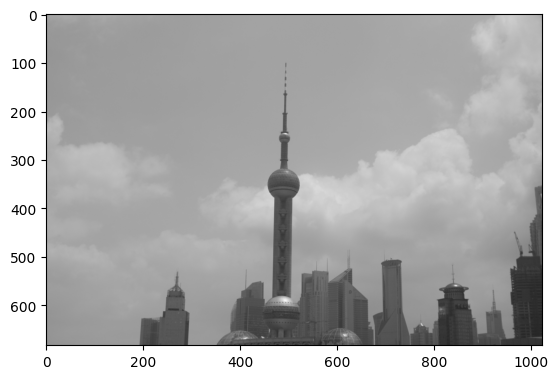

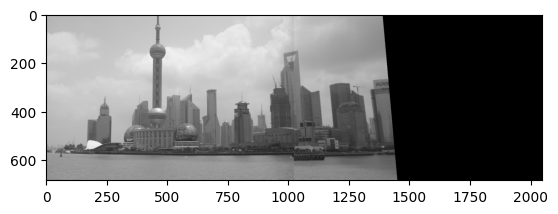

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

img6 = cv2.imread('panorama1.png')
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)
img4 = cv2.imread('images/4.png')
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

# show
plt.imshow(img4)
plt.show()
plt.imshow(img6)
plt.show()



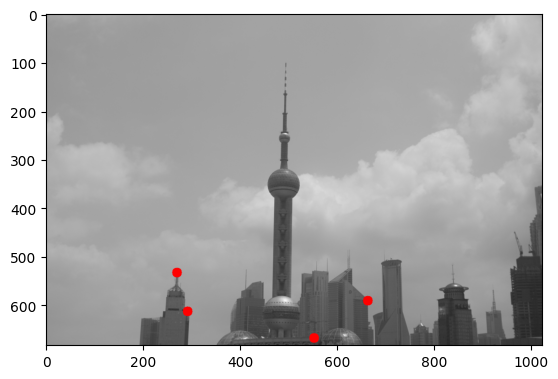

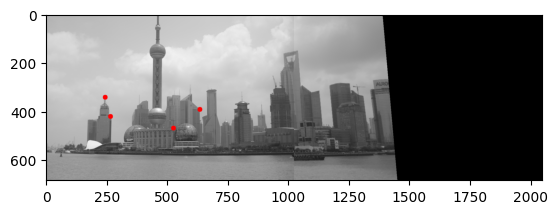

In [17]:

points4 = np.array([[664, 591], [553, 668], [292, 613], [270, 533]])

points6 = np.array([[635, 392], [526, 469], [266, 421], [244, 342]])


# show points on images
def show_points(img, points):
    img_copy = img.copy()
    for point in points:
        cv2.circle(img_copy, tuple(point), 10, (255, 0, 0), -1)
    plt.imshow(img_copy)
    plt.show()


show_points(img4, points4)
show_points(img6, points6)


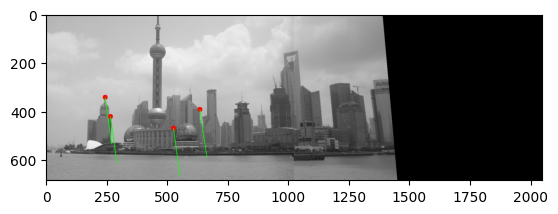

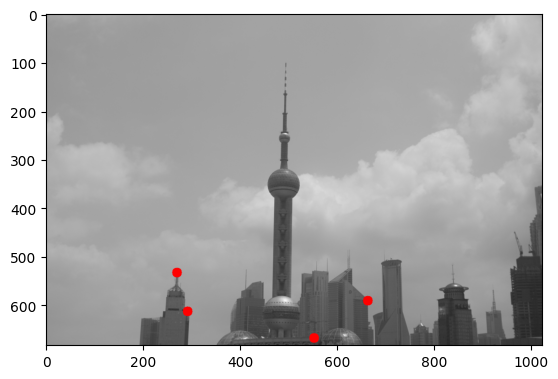

In [18]:
def get_homography_matrix(points1, points2):
    A = np.zeros((8, 9))
    for i in range(4):
        x, y = points1[i]
        u, v = points2[i]
        A[2*i] = [-x, -y, -1, 0, 0, 0, u*x, u*y, u]
        A[2*i+1] = [0, 0, 0, -x, -y, -1, v*x, v*y, v]

    U, S, V = np.linalg.svd(A)
    H = V[-1].reshape((3, 3))
    H /= H[2, 2]
    H[2, 2] = 1
    return H

# get homography matrix
H64 = get_homography_matrix(points6, points4)

# show first point and its corresponding point
def show_points_correspondence(img1, img2, points1, points2, H):
    img1_copy = img1.copy()
    img2_copy = img2.copy()
    for i in range(4):
        x, y = points1[i]
        u, v = points2[i]
        cv2.circle(img1_copy, tuple(points1[i]), 10, (255, 0, 0), -1)
        cv2.circle(img2_copy, tuple(points2[i]), 10, (255, 0, 0), -1)
        cv2.line(img1_copy, tuple(points1[i]), tuple(points2[i]), (0, 255, 0), 2)
    plt.imshow(img1_copy)
    plt.show()

    plt.imshow(img2_copy)
    plt.show()


show_points_correspondence(img6, img4, points6, points4, H64)



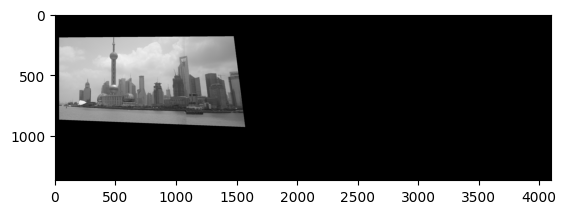

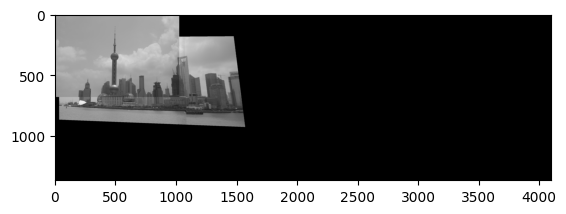

In [19]:
def print_img(img , title = None):
  plt.imshow(img, cmap = plt.get_cmap(None))
  plt.show()
  plt.close()
  print()
  return
def warp(img, H):
  ret = np.zeros((img.shape[0]*2, img.shape[1]*2, 3, 2))
  ret_img = np.zeros((img.shape[0]*2, img.shape[1]*2, 3))
  shape = img.shape
  for i in range(shape[1]):
    for j in range(shape[0]):
      pt = np.array([(i, j, 1)]).T
      pos = H.dot(pt)
      x, y = pos[0] / pos[2], pos[1] / pos[2]
      arr = np.reshape(np.array([(np.floor(x), np.floor(x), np.ceil(x), np.ceil(x)),
                      (np.floor(y), np.ceil(y), np.floor(y), np.ceil(y))]), (2, 4)).T
      arr = np.unique(arr, axis = 0)
      for k in range(len(arr)):
        x, y = int(arr[k][0]), int(arr[k][1])
        if x >= 0 and y >= 0 and x < ret.shape[1] and y < ret.shape[0]:
          for col in range(3):
            ret[y][x][col][0] += 1
            ret[y][x][col][1] += img[j][i][col] 
  
  for i in range(ret.shape[0]):
    for j in range(ret.shape[1]):
      for k in range(ret.shape[2]):
        if ret[i][j][k][0] > 0:
          ret_img[i][j][k] = np.round(ret[i][j][k][1]/ret[i][j][k][0]).astype(int)
  return ret_img

dst = warp(img6, H64).astype(int)
plt.imshow(dst)
plt.show()
dst[0:img4.shape[0], 0:img4.shape[1]] = img4
print_img(dst, title = 'Final output')

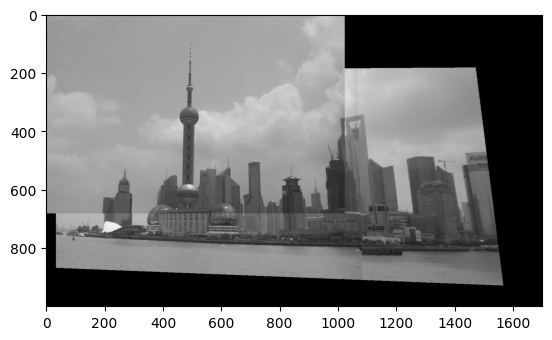

In [21]:
dst_copy = dst.copy()
dst_copy = dst_copy[:, :1700, :]
dst_copy = dst_copy[:1000, :, :]

plt.imshow(dst_copy)
plt.show()


In [24]:
# save bonus.png dst_copy
cv2.imwrite('bonus.png',dst_copy)


True